# 1.- Clusters in Grain Dataset

## How many clusters of grain?

Let's see how to choose a good number of clusters for a dataset using the k-means inertia graph. First, we are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?. [This dataset was sourced from the UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/seeds)

In [1]:
# importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import KMeans
from sklearn.cluster import KMeans

In [2]:
# loading data 

samples = pd.read_csv('data/Grains/seeds.csv', header=None)
samples.head()

# loading varieties np array
varieties = np.load('data/Grains/varieties.npy')

Let's try to find the optimus number of clusters

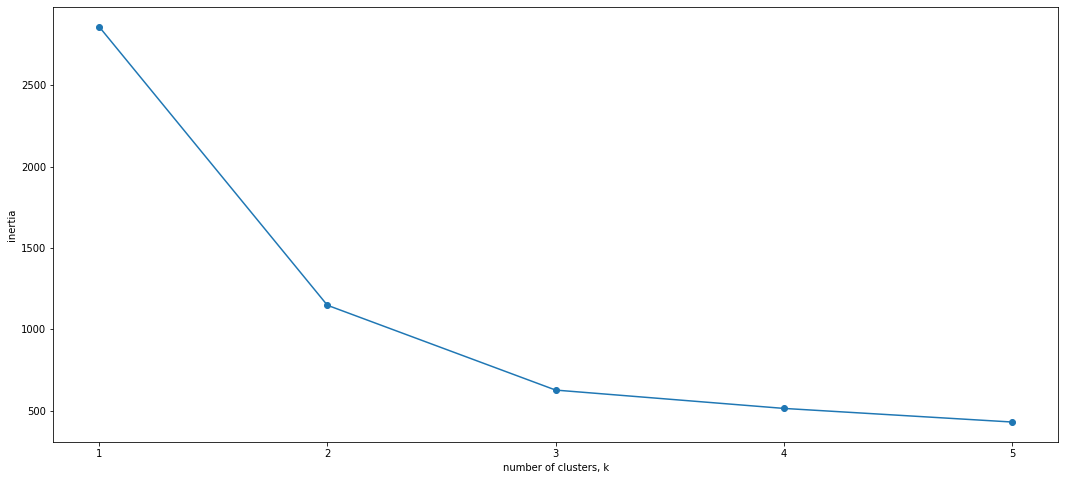

In [3]:
# creates elbow plot

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(18, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks);

Three can be a good choice for the right number of clusters 

## Evaluating the grain clustering

Previously, we observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

In [4]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df.labels, df.varieties)

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       0           1          60
1                      70           5           0
2                       0          64          10


# 2.- Scaling fish data for clustering

We are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the Journal of Statistics were Education.Journal(http://jse.amstat.org/jse_data_archive.htm)

In [5]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [6]:
samples = pd.read_csv('data/fish.csv', header=None)
samples.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [7]:
# Fit the pipeline to samples
pipeline.fit(samples.loc[:,1:])

# Calculate the cluster labels: labels
samples['labels'] = pipeline.predict(samples.loc[:,1:])

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': samples.labels, 'species': samples[0]})

# Create crosstab: ct
ct = pd.crosstab(df.labels, df.species)

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0    17      0      0
1            1     0     19      1
2           33     0      1      0
3            0     0      0     13


# 3.- Clustering stocks using KMeans

In this exercise, we'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). We are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Normalizer() is different to StandardScaler(). While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

In [8]:
movements = pd.read_csv('data/company-stock-movements-2010-2015-incl.csv')
movements.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [9]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements.iloc[:,1:])

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [10]:
# Predict the cluster labels: labels
movements['labels'] = pipeline.predict(movements.iloc[:, 1:])

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': movements.labels.values, 'companies': movements.iloc[:, 0].values})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
28       0                           Coca Cola
38       0                               Pepsi
1        1                                 AIG
3        1                    American express
5        1                     Bank of America
55       1                         Wells Fargo
18       1                       Goldman Sachs
16       1                   General Electrics
26       1                      JPMorgan Chase
15       1                                Ford
10       2                      ConocoPhillips
57       2                               Exxon
53       2                       Valero Energy
44       2                        Schlumberger
12       2                             Chevron
29       3                     Lookheed Martin
4        3                              Boeing
36       3                    Northrop Grumman
50       4  Taiwan Semiconductor Manufacturing
33       4                           Microsoft
51       4   